# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS
## Week 7 - Waves

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
from time import sleep
import ipywidgets as widgets

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

# Interference

In [57]:
def plot_wave_interferance(omega1, omega2, phi1, phi2, A1, A2, show_sum):
    t = np.linspace(0, 2*np.pi, 100)
    y1 = A1*np.cos(omega1*t + phi1)
    y2 = A2*np.cos(omega2*t + phi2)
    y = y1 + y2
    plt.plot(t, y1, label='$y_1(t)$')
    plt.plot(t, y2, label='$y_2(t)$')
    if show_sum == True:
        plt.plot(t, y, ls='--', label='$y_1(t) + y_2(t)$')
    plt.xlabel('t')
    plt.xlim(0, 2*np.pi)
    plt.xticks(np.arange(0,2*np.pi+0.5*np.pi, 0.5*np.pi))
    plt.ylim(-5,5)
    plt.grid()
    plt.legend(loc='lower right')
    plt.title('Wave interferance')
    plt.show()
    
omega1_slider = widgets.FloatSlider(min=0.0, max=+3.0, value=1.0, step=0.1, continuous_update=True)
omega2_slider = widgets.FloatSlider(min=0.0, max=+3.0, value=2.0, step=0.1, continuous_update=True)
phi1_slider = widgets.FloatSlider(min=0.0, max=2*np.pi, value=0.0, step=0.1*np.pi, continuous_update=True)
phi2_slider = widgets.FloatSlider(min=0.0, max=2*np.pi, value=0.0, step=0.1*np.pi, continuous_update=True)
A1_slider = widgets.FloatSlider(min=0.0, max=+2.0, value=1.0, step=0.1, continuous_update=True)
A2_slider = widgets.FloatSlider(min=0.0, max=+2.0, value=1.0, step=0.1, continuous_update=True)
sum_check = widgets.Checkbox(value=False, description='Show sum', disabled=False)

gui = widgets.interactive(plot_wave_interferance, omega1=omega1_slider, omega2=omega2_slider,
                         phi1=phi1_slider, phi2=phi2_slider,
                         A1=A1_slider, A2=A2_slider, show_sum=sum_check)

display.display(gui)

interactive(children=(FloatSlider(value=1.0, description='omega1', max=3.0), FloatSlider(value=2.0, descriptio…

## Waves in 1D

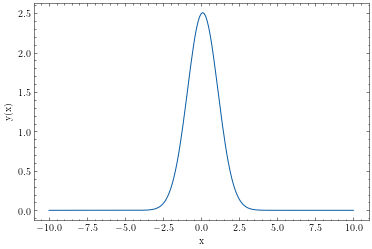

In [2]:
# Gaussian pulse

def pulse(x, mu = 0.0, sigma = 1.0):
    """Normalized gaussian pulse with mean mu and std. dev. sigma."""
    return (1/sigma*np.sqrt(2*np.pi))*np.exp(-0.5*(x - mu)**2 / sigma**2)

dx = 0.1
x = np.arange(-10, 10+dx, dx)

plt.plot(x, pulse(x, mu=0.1, sigma=1.0))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

In [3]:
# Wave velocity
v = 1.0

# space discretization
dx = 0.1
x = np.arange(-10, 10+dx, dx)

# time discretization
dt = dx/v
t = np.arange(0, 20+dt, dt)

# Number of discrete points in space and time

Nx = len(x)
Nt = len(t)

In [4]:
# Setting initial conditions for v=0 at t=0

y = np.zeros((Nt, Nx))

# Initial conditions

y[0] = pulse(x)
y[1] = pulse(x)

# Dirichlet boundaries

y[0][0] = 0.0
y[0][-1] = 0.0

y[1][0] = 0.0
y[1][-1] = 0.0

# Doing the time evolution

for n in range(1, Nt-1):
    for k in range(1, len(x)-1):
        y[n+1][k] = y[n][k+1] + y[n][k-1] - y[n-1][k] 

In [5]:
# # Doing a simple animation with display

# for i in range(Nt):
#     plt.plot(x, y[i])
#     plt.text(-9, 1.0, f"t = {t[i]:.1f}")
#     display.clear_output(wait=True)
#     plt.ylim(-3.0, 3.0)
#     plt.xlabel('x')
#     plt.ylabel('y(x)')
#     plt.show()  

In [6]:
# Animating with matplotlib.animate

fig = plt.figure()
lines = plt.plot([])
line = lines[0]
time_text = plt.text(-7, 2, "")
plt.ylim(-3.0, 3.0)
plt.xlim(-10.1, 10.1)
plt.xlabel('x')
plt.title('Gaussian pulse with zero velocity')

def animate(frame):
    line.set_data((x, y[frame]))
    time_text.set_text(f't = {t[frame]:.1f}')
    
anim = FuncAnimation(fig, animate, frames=Nt, interval=dt*1000)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [7]:
# Packing into a function

def wave_evolution(y):    
    for n in range(1, Nt-1):
        for k in range(1, Nx-1):
            y[n+1][k] = y[n][k+1] + y[n][k-1] - y[n-1][k]
    return y

In [8]:
# Setting initial velocity v = 1

y = np.zeros((Nt, Nx))

y[0] = pulse(x, mu=0.0)
y[1] = pulse(x, mu=0.1)

# Dirichlet boundaries

y[0][0] = 0.0
y[0][-1] = 0.0

y[1][0] = 0.0
y[1][-1] = 0.0
      
# Do the wave evolution

y = wave_evolution(y)

In [9]:
# Animating

fig = plt.figure()
lines = plt.plot([])
line = lines[0]
time_text = plt.text(-7, 2, "")
plt.ylim(-3.0, 3.0)
plt.xlim(-10.1, 10.1)
plt.xlabel('x')
plt.title('Gaussian pulse with v = 1')

def animate(frame):
    line.set_data((x, y[frame]))
    time_text.set_text(f't = {t[frame]:.1f}')
    
anim = FuncAnimation(fig, animate, frames=Nt, interval=dt*1000)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

##  Relaxation method in 1D

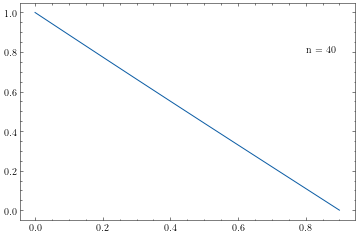

In [10]:
dx = 0.1
x = np.arange(0, 1, dx)

Nx = len(x)
Nt = 40 # Number of trials

y = np.zeros((Nt, Nx))

# Boudaries
y[:, 0] = 1.0
y[:, -1] = 0.0

for n in range(Nt-1):
    for i in range(1, Nx-1):
        y[n, i] = 0.5*(y[n, i-1] + y[n, i+1])
        y[n+1] = y[n]
        
# Doing a simple animation with display

for i in range(Nt):
    plt.plot(x, y[i])
    plt.text(0.8, 0.8, f"n = {i+1}")
    display.clear_output(wait=True)
    plt.show()  

## Relaxation method in 2D

In [11]:
# Number of trials and space discretization
N_max = 10000
N_xy = 101

# Boundaries and starting conditions
border = np.linspace(0, 1, N_xy)
xv, yv = np.meshgrid(border, border)

V = np.zeros((101,101))
V[:,0] = 5.0
V[:,-1] = -5.0

def relax_2d(V):
    for n in range(N_max):
        for i in range(1, N_xy-1):
            for j in range(1, N_xy-1):
                V_last = V.copy()
                V[i,j] = 0.25*(V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1])
        if np.max(abs(V_last - V)) < 1e-6:
            print(f"Solution converged in {n+1} steps.")
            break
    else:
        print(f"Solution failed to converge.")
    return V

V = relax_2d(V)

Solution converged in 1104 steps.


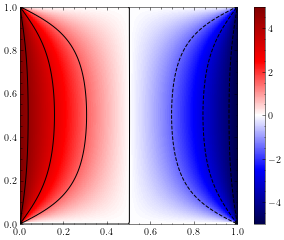

In [12]:
# Plotting solution

plt.imshow(V, cmap='seismic', origin='lower', vmin=-5.0, vmax=+5.0, extent=(0,1,0,1))
plt.colorbar()
plt.contour(xv, yv, V, colors='black')
plt.show()

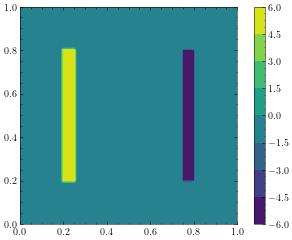

In [13]:
# Doing a parallel plate capacitor

def capacitor(x, y):
    pos_plate = (x >= 0.2) * (x <= 0.25) * (y >= 0.2) * (y <= 0.8)
    neg_plate = (x >= 0.75) * (x <= 0.8) * (y >= 0.2) * (y <= 0.8)
    not_plates = np.invert(pos_plate + neg_plate)
    return np.select([pos_plate, neg_plate, not_plates], [5.0, -5.0, 0.0])

plt.contourf(xv, yv, capacitor(xv, yv))
plt.axis('scaled')
plt.colorbar()
plt.show()

In [14]:
# Initial guess
V = capacitor(xv, yv)

# Boolean with fixed points
capacitor_points = (capacitor(xv, yv) == 0)

for n in range(1000):
    for i in range(1, N_xy-1):
        for j in range(1, N_xy-1):
            if capacitor_points[i,j]:
                V_last = V.copy()
                V[i,j] = 0.25*(V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1])

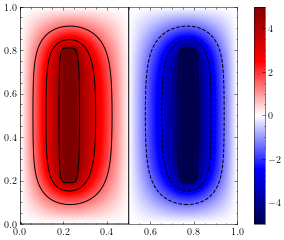

In [15]:
# Plotting

plt.imshow(V, cmap='seismic', origin='lower', vmin=-5.0, vmax=+5.0, extent=(0,1,0,1))
plt.colorbar()
plt.contour(xv, yv, V, colors='black')
plt.show()

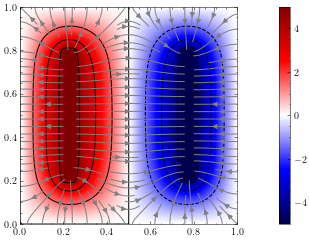

In [16]:
# Calculating the E field

Ey, Ex = np.gradient(-V, dx)
plt.imshow(V, cmap='seismic', origin='lower', vmin=-5.0, vmax=+5.0, extent=(0,1,0,1))
plt.colorbar()
plt.contour(xv, yv, V, colors='black')
plt.streamplot(xv, yv, Ex, Ey, density=1, color='gray')
plt.axis('scaled')
plt.show()